In [1]:
# coding: utf-8
#to do
#1: A feature amount is generated from each item. Ticket and Cabin are excluded this time.
#2: Use the grid search to get the best parameters.
#3: Make data for submission using the best result parameter.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
test_result = pd.read_csv("./gender_submission.csv")

#For data processing, make train, test and answer all together and make over 1300 data sets. (To divide later)

test = pd.merge(test_data, test_result, how="outer", on="PassengerId")
df = pd.concat([train, test], axis=0).reset_index(drop=True)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [2]:
#1: A feature amount is generated from each item. Ticket and Cabin are excluded this time.

df = pd.get_dummies(df, columns=["Embarked"], prefix="Em")
df = pd.get_dummies(df, columns=["Sex"])
df.drop(labels=["Ticket","Cabin"], axis=1, inplace=True)
df.head()

,Age,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Em_C,Em_Q,Em_S,Sex_female,Sex_male
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0,0,0,1,0,1
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,0,0,1,0
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1,0,0,1,1,0
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,0,0,1,1,0
4,35.0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,0,1,0,1


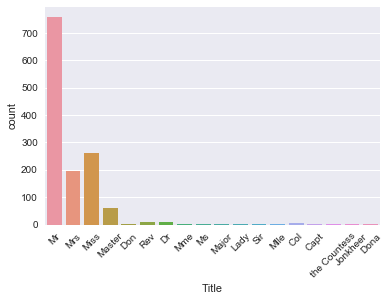

In [3]:
#Detects the title from the name and converts it into the feature quantity
df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(df_title)
#df["Title"].value_counts() #Because Mlle looked like Mile and made a spelling mistake, for confirmation
g = sns.countplot(x="Title", data=df)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [4]:
df["Title"] = df["Title"].replace(['the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms":1, "Mme":1, "Mlle":1, "Lady":1, "Mrs":2, "Mr":3, "Rare":4})
df["Title"] = df["Title"].astype('int')
df.drop(labels=["Name"], axis=1, inplace=True)

df.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Em_C,Em_Q,Em_S,Sex_female,Sex_male,Title
0,22.0,7.2500,0,1,3,1,0,0,0,1,0,1,3
1,38.0,71.2833,0,2,1,1,1,1,0,0,1,0,2
2,26.0,7.9250,0,3,3,0,1,0,0,1,1,0,1
3,35.0,53.1000,0,4,1,1,1,0,0,1,1,0,2
4,35.0,8.0500,0,5,3,0,0,0,0,1,0,1,3


In [5]:
#Fill Fare missing values with the median value
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

#Apply log to Fare to reduce skewness distribution
df["Fare"] = df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

df.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Em_C,Em_Q,Em_S,Sex_female,Sex_male,Title
0,22.0,1.981001,0,1,3,1,0,0,0,1,0,1,3
1,38.0,4.266662,0,2,1,1,1,1,0,0,1,0,2
2,26.0,2.070022,0,3,3,0,1,0,0,1,1,0,1
3,35.0,3.972177,0,4,1,1,1,0,0,1,1,0,2
4,35.0,2.085672,0,5,3,0,0,0,0,1,0,1,3


In [6]:
#Missing value of age is filled with average
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [7]:
#Repartition the data set back to the training set and test set.

X_train = pd.DataFrame(df[:len(train)])
X_test = pd.DataFrame(df[len(train):])

Y_train = pd.Series(X_train["Survived"])
X_train.drop(labels=["Survived","PassengerId"], axis=1, inplace=True)

X_test.drop(labels=["Survived","PassengerId"], axis=1, inplace=True)

X_train.head()

,Age,Fare,Parch,Pclass,SibSp,Em_C,Em_Q,Em_S,Sex_female,Sex_male,Title
0,22.0,1.981001,0,3,1,0,0,1,0,1,3
1,38.0,4.266662,0,1,1,1,0,0,1,0,2
2,26.0,2.070022,0,3,0,0,0,1,1,0,1
3,35.0,3.972177,0,1,1,0,0,1,1,0,2
4,35.0,2.085672,0,3,0,0,0,1,0,1,3


In [8]:
#2: Use the grid search to get the best parameters.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [9]:
RFC = RandomForestClassifier()
RF_Param_Grid = {
    "max_depth": [4,8,16,32],
    "min_samples_split": [2,4,8,16],
    "min_samples_leaf": [1,3],
    "bootstrap": [False],
    "n_estimators": [50,100],
    "criterion": ["gini"]
}
kfold = StratifiedKFold(n_splits=10)

g_clf = GridSearchCV(RFC, param_grid=RF_Param_Grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)
g_clf.fit(X_train, Y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [4, 8, 16, 32], 'min_samples_split': [2, 4, 8, 16], 'min_samples_leaf': [1, 3], 'bootstrap': [False], 'n_estimators': [50, 100], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [10]:
g_clf.best_score_

0.84287317620650959

In [11]:
g_clf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 50}

In [12]:
#3: Make data for submission using the best result parameter.

bp = g_clf.best_params_

clf = RandomForestClassifier(
    bootstrap=bp["bootstrap"], 
    criterion=bp["criterion"], 
    max_depth=bp["max_depth"], 
    min_samples_leaf=bp["min_samples_leaf"], 
    min_samples_split=bp["min_samples_split"], 
    n_estimators=bp["n_estimators"]
)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
IDtest = test_data["PassengerId"]
test_Survived = pd.Series(clf.predict(X_test), name="Survived")
results = pd.concat([IDtest, test_Survived], axis=1)

results.to_csv("./work/titanic_try_20171017g.csv", index=False)

In [ ]:
#0.80382